<a href="https://colab.research.google.com/github/harnalashok/LLMs/blob/main/LLM_01_huggingface_transformers_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<iframe src="https://www.kaggle.com/embed/aliabdin1/llm-01-how-to-use-llms-with-hugging-face?cellIds=4&kernelSessionId=140351055" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="⚡LLM 01 - How to use LLMs with Hugging Face⚡"></iframe>

<iframe src="https://www.kaggle.com/embed/aliabdin1/llm-01-how-to-use-llms-with-hugging-face?cellIds=4&kernelSessionId=140351055" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="⚡LLM 01 - How to use LLMs with Hugging Face⚡"></iframe>

In [ ]:
# Last amended: 29th April, 2024
# Ref: Kaggle: https://www.kaggle.com/code/aliabdin1/llm-01-how-to-use-llms-with-hugging-face?scriptVersionId=140351055
# HuggingFace Notebooks: https://huggingface.co/docs/transformers/notebooks

Not sure if this notebook was run using colab. But this notebook has secret tokens stored.

## Objective(s)

The goal of this notebook is to get your feet wet with several LLM applications and to show how easy it can be to get started with LLMs. As you go through the examples, note the datasets, models, APIs, and options used. These simple examples can be starting points when you need to build your own application.

## Useful References:
Not all references pertain to this notebook

- BioGPT model: [BioGPT: Generative Pre-trained Transformer for Biomedical Text Generation and Mining](https://arxiv.org/pdf/2210.10341.pdf)   <br>   

- Storing your embeddings of a knowledge project in HuggingFace. See this [link](https://huggingface.co/blog/getting-started-with-embeddings)   <br>

- Medical related models on huggingface link [here](https://huggingface.co/models?other=medical&sort=likes)

- HuggingFace Transformers Notebooks collection [link](https://huggingface.co/docs/transformers/notebooks)    

- A Short Course on Finetuning Large Language Models [Link](https://www.deeplearning.ai/short-courses/finetuning-large-language-models/)

- PrivateChat GPT on Colab using langchain and Gradio interface [Link](https://levelup.gitconnected.com/building-a-private-ai-chatbot-2c071f6715ad)    

- Colab notebook in the above project [Link](https://colab.research.google.com/drive/1rCtjTDMIfc9AE6SFNFerP7w6bieWMASf?usp=sharing#scrollTo=VVuVbgj9m6Ja)    

- RAG with ollama--simple code. Link [here](https://ollama.com/blog/embedding-models)   

- LLM Leaderboards

>> Open Medical-LLM Leaderboard [Link here](https://huggingface.co/blog/leaderboard-medicalllm)

>> Open Chain of Thought Leaderboard [Link here](https://huggingface.co/blog/leaderboard-cot)

- RAG & Fine Tuning   

>> How should I prepare the dataset for generative question answering on the private documents? [Link](https://github.com/lxe/simple-llm-finetuner/issues/38)

>>  Can this model be used for the Generative Question Answering? [Link](https://github.com/karpathy/nanoGPT/issues/197)    

>>reddit: My experience on starting with fine tuning LLMs with custom data [Link](https://www.reddit.com/r/LocalLLaMA/comments/14vnfh2/my_experience_on_starting_with_fine_tuning_llms/)     

>> Example of dataset used for finetuning. [huggingface Link](https://huggingface.co/datasets/yahma/alpaca-cleaned)

- Deeplearning.ai [Finetuning LLM course](https://www.deeplearning.ai/short-courses/finetuning-large-language-models/)

## Log into huggingface using your token:
See [this](https://www.youtube.com/watch?v=mn_hdJ5w92A) video as to how to supply token in colab for logging into huggingface.

In [ ]:
# 0.0 Login to huggingface using your token:
#     Keep your token ready:

! pip install huggingface_hub
from huggingface_hub import notebook_login
notebook_login()

## Install packages & call libraries

In [ ]:
# 0.1 Sacremoses is for the translation model Helsinki-NLP/opus-mt-en-es:

!pip install sacremoses==0.0.53

In [ ]:
# 0.2 Install datasets and transformers:
#     About transformers, see below

! pip install datasets transformers

In [ ]:
# 0.3 What is accelerate? See below

!pip install -U accelerate --quiet

In [ ]:
# 0.4 Call libraries:

from datasets import load_dataset
from transformers import pipeline
import pandas as pd

In [ ]:
# 0.5 Current present work directory:
! pwd

# 0.6 Make folder to store datasets/models
! mkdir cache

/content
mkdir: cannot create directory ‘cache’: File exists


## About packages
No code here

### About Accelerate

Each distributed training framework has their own way of doing things which can require writing a lot of custom code to adapt it to your PyTorch training code and training environment. Accelerate offers a friendly way to interface with these distributed training frameworks without having to learn the specific details of each one. Accelerate takes care of those details for you, so you can focus on the training code and scale it to any distributed training environment. One can run code on any kind of single or distributed node setting (single CPU, single GPU, multi-GPUs and TPUs) as well as with or without mixed precision (fp8, fp16, bf16).

### About transformers:   
transformers is a library maintained by Hugging Face and the community, for state-of-the-art Machine Learning for Pytorch, TensorFlow and JAX. It provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio. We are a bit biased, but we really like 🤗 transformers!

### Transformers are language models--[Link here](https://huggingface.co/learn/nlp-course/en/chapter1/4)

All the Transformer models (GPT, BERT, BART, T5, etc.) have been trained as language models. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called transfer learning. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task.

An example of a task is predicting the next word in a sentence having read the n previous words. This is called *causal language modeling* because the output depends on the past and present inputs, but not the future ones.

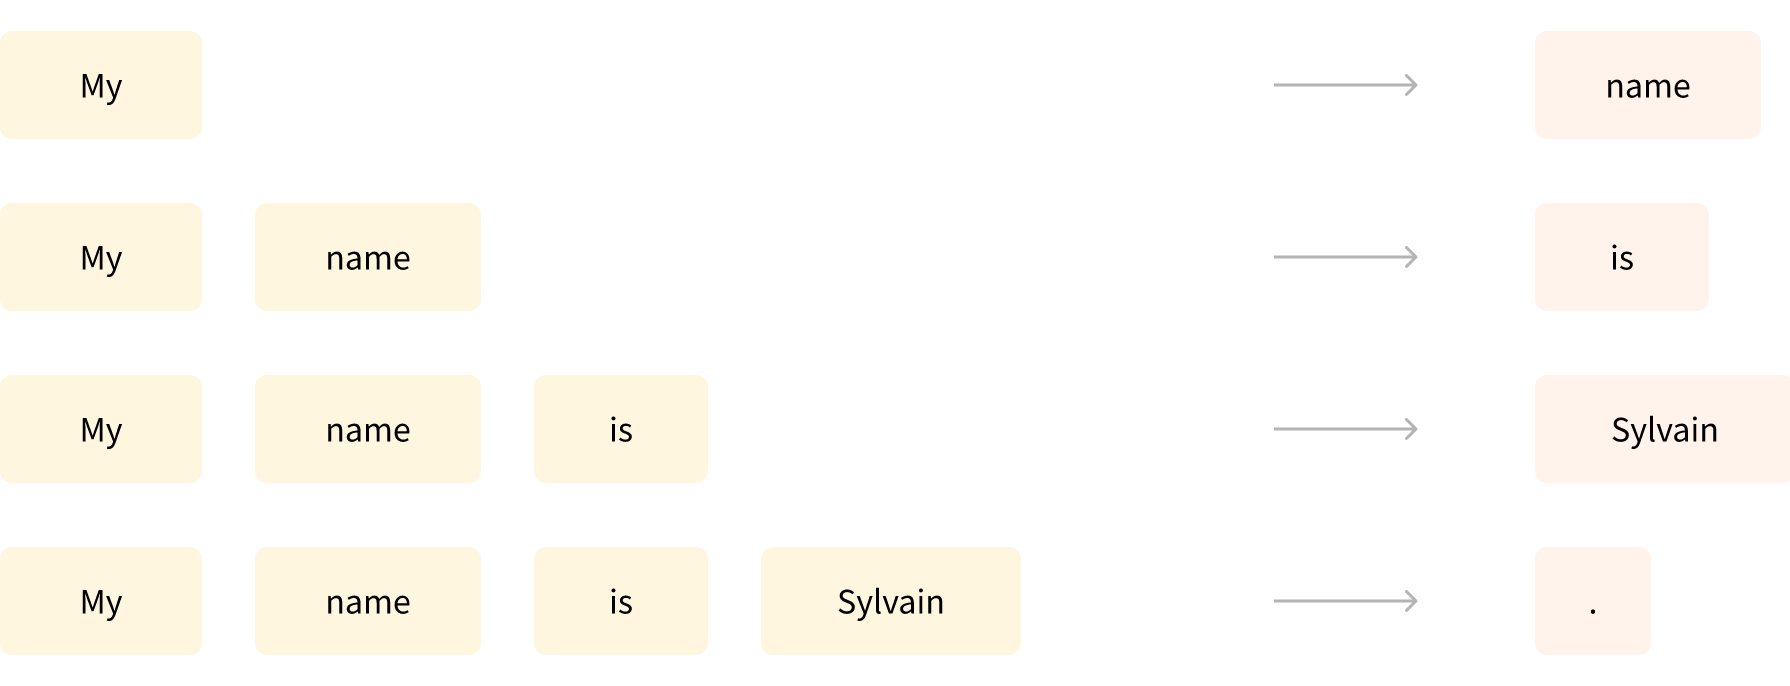

Another example is masked language modeling, in which the model predicts a masked word in the sentence.

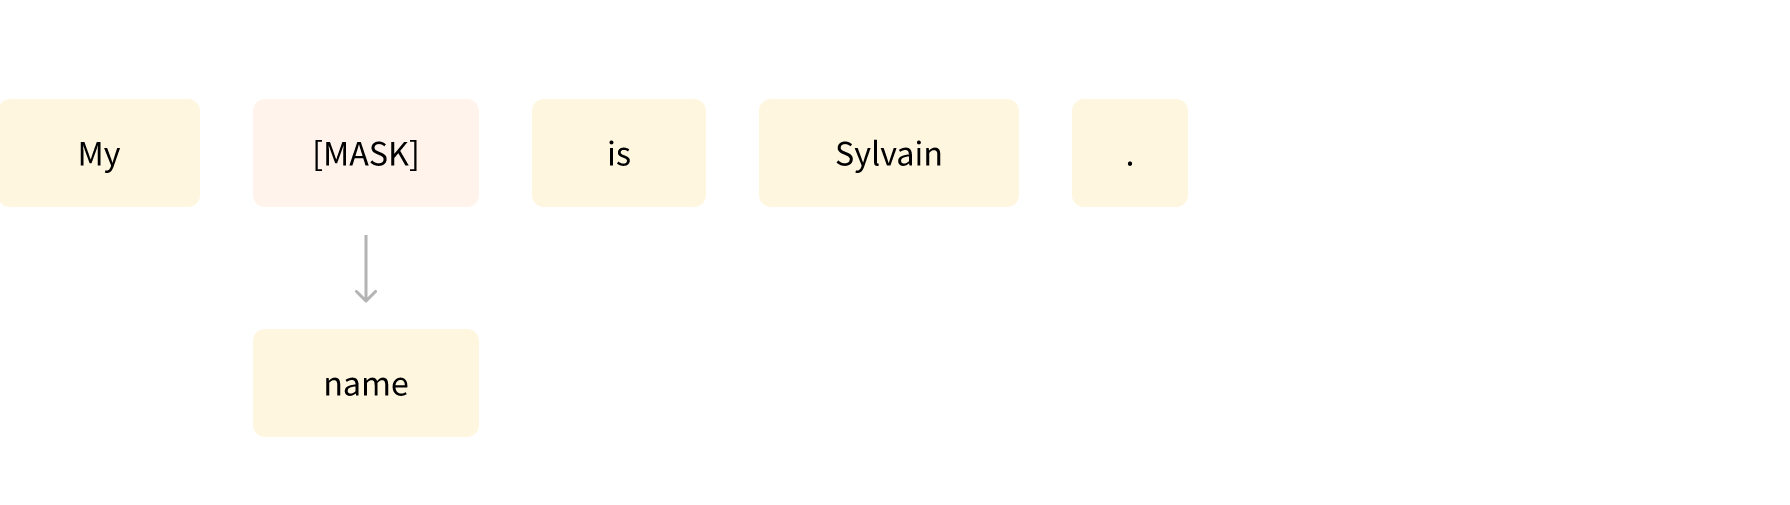

### Transformers are big models

Apart from a few outliers (like DistilBERT), the general strategy to achieve better performance is by increasing the models’ sizes as well as the amount of data they are pretrained on.

Exploring 🤗 transformers in the Hub

There are over 25,000 transformers models in the Hub which you can find by filtering at the left of the models page.

You can find models for many different tasks:

* Extracting the answer from a context [question-answering](https://huggingface.co/models?library=transformers&pipeline_tag=question-answering&sort=downloads)
* Creating summaries from a large text [summarization](https://huggingface.co/models?library=transformers&pipeline_tag=summarization&sort=downloads).
* Classify text e.g. as spam or not spam, [text-classification](https://huggingface.co/models?library=transformers&pipeline_tag=text-classification&sort=downloads).
* Generate a new text with models such as GPT [text-generation](https://huggingface.co/models?library=transformers&pipeline_tag=text-generation&sort=downloads).
* Identify parts of speech (verb, subject, etc.) or entities (country, organization, etc.) in a sentence [token-classification](https://huggingface.co/models?library=transformers&pipeline_tag=token-classification&sort=downloads).
* Transcribe audio files to text [automatic-speech-recognition](https://huggingface.co/models?library=transformers&pipeline_tag=automatic-speech-recognition&sort=downloads).
* Classify the speaker or language in an audio file [audio-classification](https://huggingface.co/models?library=transformers&pipeline_tag=audio-classification&sort=downloads).
* Detect objects in an image [object-detection](https://huggingface.co/models?library=transformers&pipeline_tag=object-detection&sort=downloads).
* Segment an image [image-segmentation](https://huggingface.co/models?library=transformers&pipeline_tag=image-segmentation&sort=downloads).
* Do Reinforcement Learning [reinforcement-learning](https://huggingface.co/models?library=transformers&pipeline_tag=reinforcement-learning&sort=downloads)!

You can try out the models directly in the browser if you want to test them out without downloading them thanks to the in-browser widgets!

All transformer models are a line away from being used! Depending on how you want to use them, you can use the high-level API using the pipeline function or you can use AutoModel for more control.

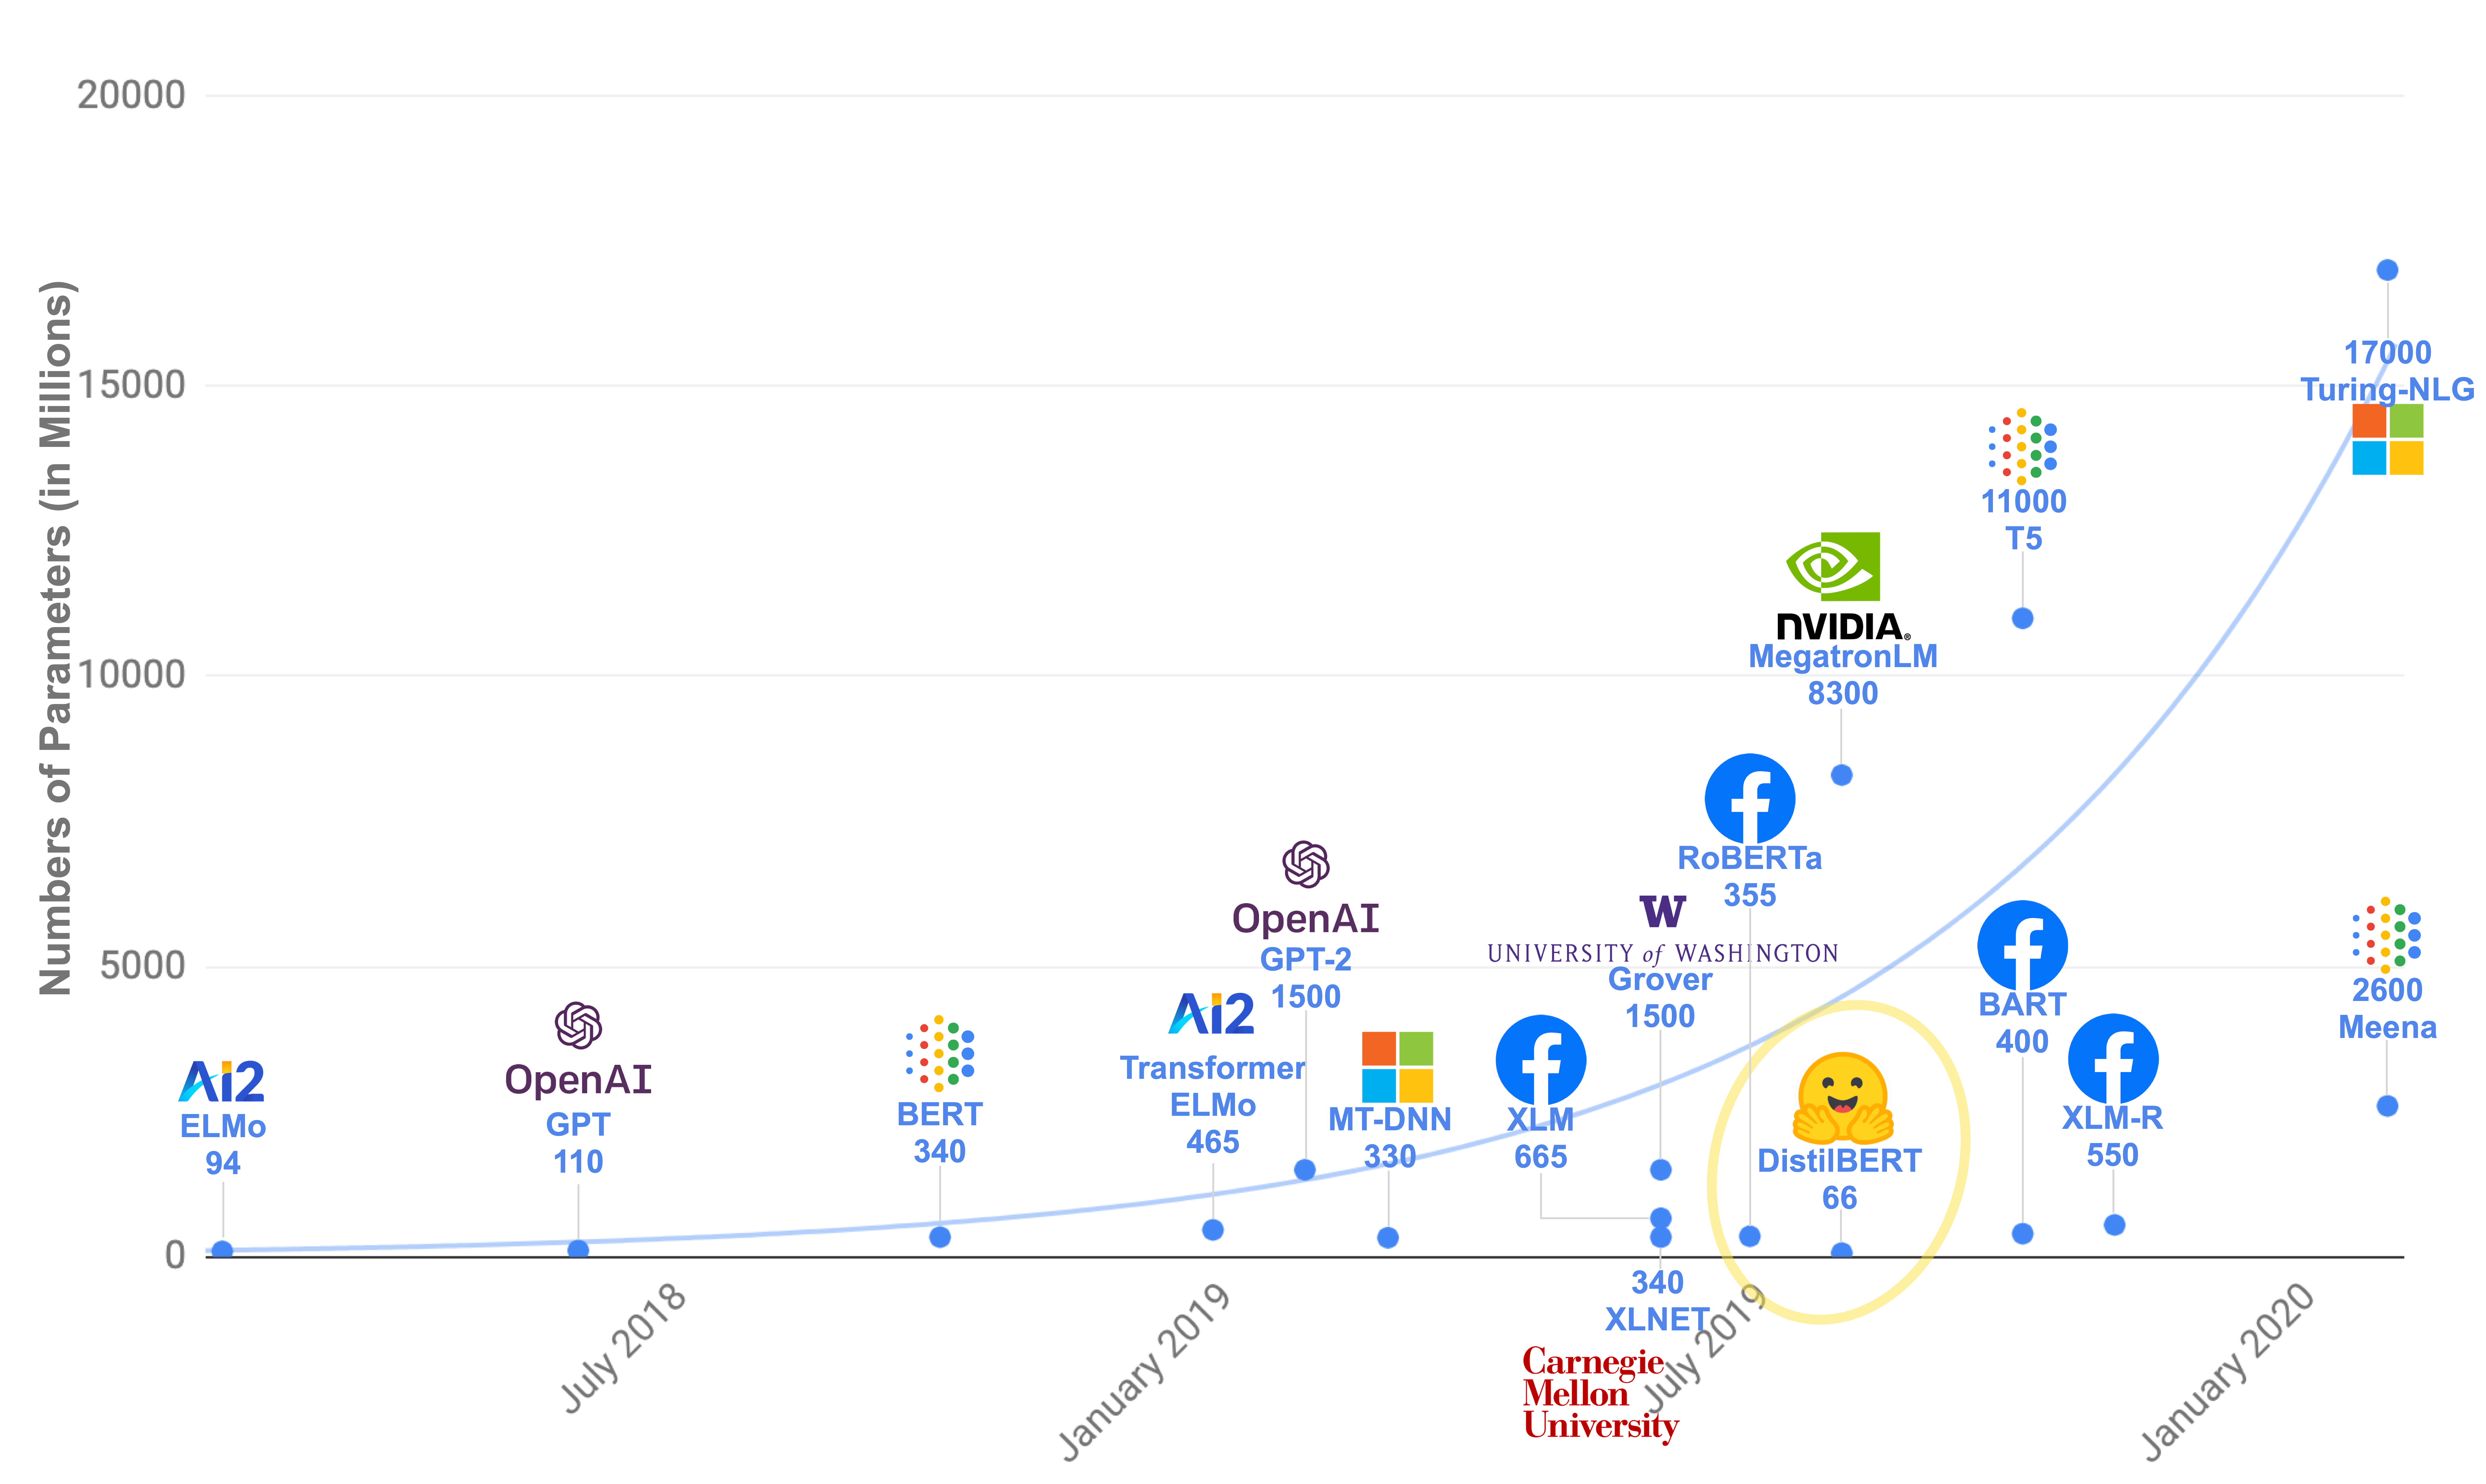

Unfortunately, training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources. It even translates to environmental impact, as can be seen in the following graph.

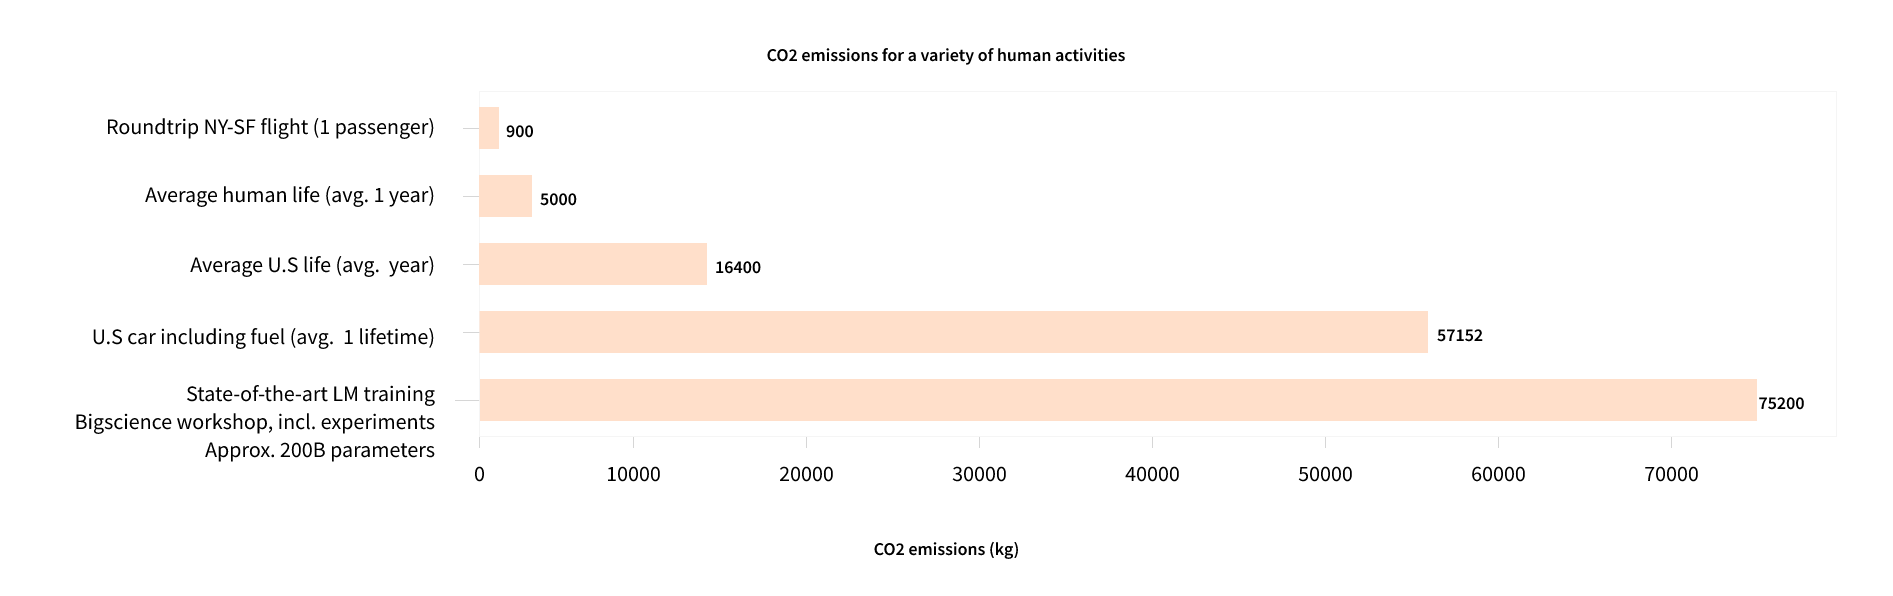

Imagine if each time a research team, a student organization, or a company wanted to train a model, it did so from scratch. This would lead to huge, unnecessary global costs!

This is why sharing language models is paramount: sharing the trained weights and building on top of already trained weights reduces the overall compute cost and carbon footprint of the community.

### Transfer Learning   
Pretraining is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.


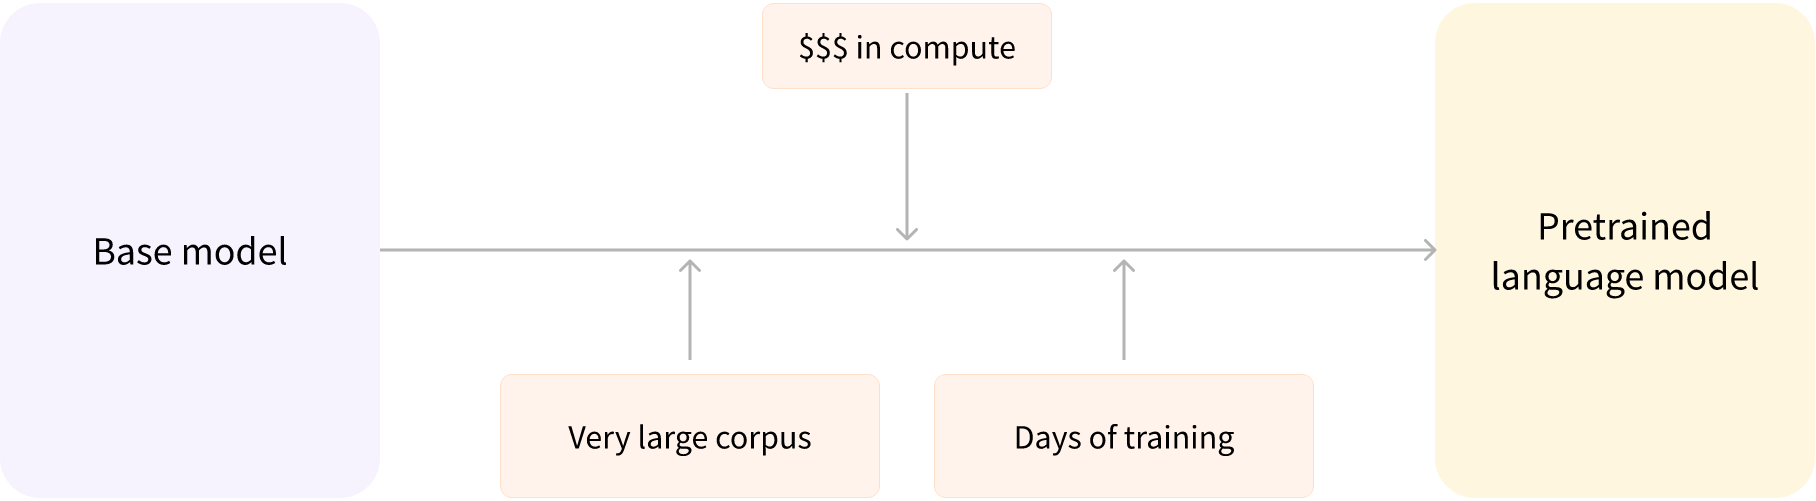

This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

Fine-tuning, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Wait — why not simply train the model for your final use case from the start (scratch)? There are a couple of reasons:

* The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
* Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
* For the same reason, the amount of time and resources needed to get good results are much lower.

For example, one could leverage a pretrained model trained on the English language and then fine-tune it on an arXiv corpus, resulting in a science/research-based model. The fine-tuning will only require a limited amount of data: the knowledge the pretrained model has acquired is “transferred,” hence the term transfer learning.

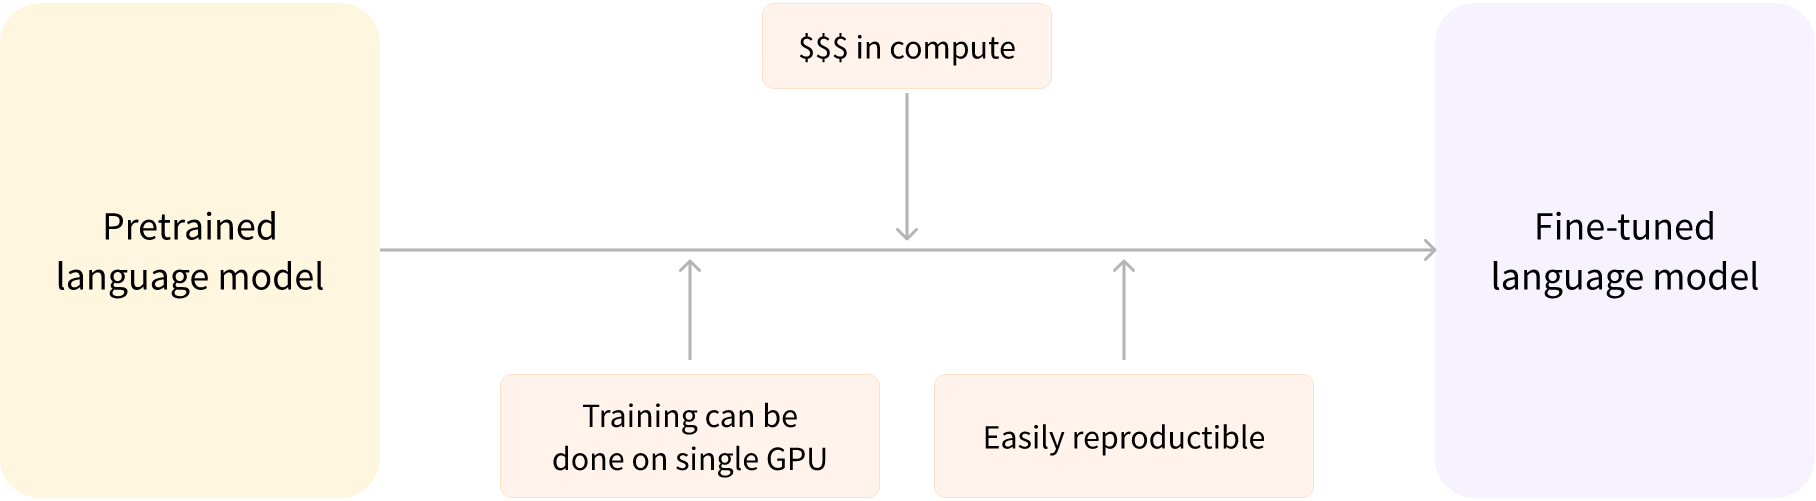

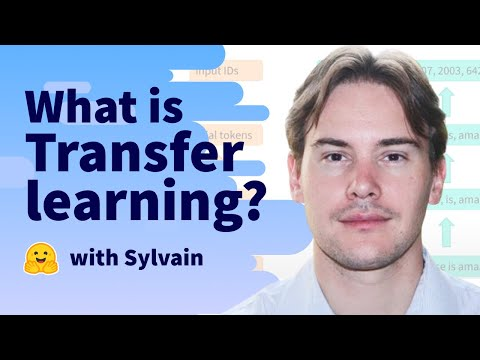

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('BqqfQnyjmgg')

How to select a huggingface model:    

To select a `summarization` model, go to [huggingface](https://huggingface.co/). Click on `Models` (It is Ist among the top menu). When on `Models` page, look for `Natural Language Processing-->Summarization`. You will get models that perform summarization. Among these, sort models by, say, `Trending` or `Most likes` etc. Click on any one of the models names. Go to its page (`Model Card`) and copy its full name and write it below against model.

### General architecture of transformers
See huggingface [here](https://huggingface.co/learn/nlp-course/en/chapter1/4#general-architecture)

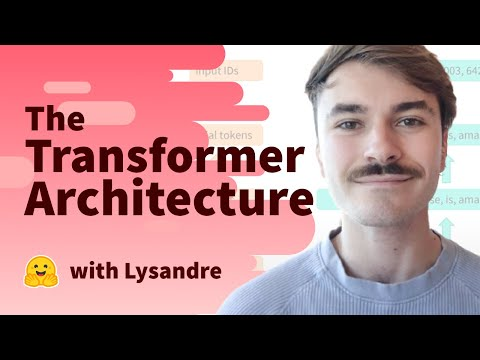

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('H39Z_720T5s')

## Tasks

### Summarization

Download EdinburghNLP/xsum dataset. Dataset card is [here](https://huggingface.co/datasets/EdinburghNLP/xsum). There are a number of datasets with name 'xum'. See all of them [here](https://huggingface.co/datasets?task_categories=task_categories:summarization&sort=downloads&search=xsum)

In [ ]:
# 1.0 Download xsumn dataset:
xsum_dataset = load_dataset(
                             "xsum",
                             version="1.2.0",
                             cache_dir="/content/cache/",
                             trust_remote_code = True
                            )  # Note: We specify cache_dir to use predownloaded data.


In [ ]:
# 1.1
type(xsum_dataset)    # A special object of dict type
                      # Try xsum_dataset.<tab>

datasets.dataset_dict.DatasetDict

In [ ]:
# 1.2 The printed representation of this object
#      also names of splits, features and `num_rows`
#       of each dataset split.

xsum_dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})

In [ ]:
# 1.3 Take top-10 samples from 'train' data of his data:

xsum_sample = xsum_dataset["train"].select(range(10))

In [ ]:
# 1.4 Print information about this data:

xsum_sample

Dataset({
    features: ['document', 'summary', 'id'],
    num_rows: 10
})

In [ ]:
# 1.5 Transform to pandas:

xsum_sample.to_pandas()

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984
5,Simone Favaro got the crucial try with the las...,Defending Pro12 champions Glasgow Warriors bag...,34540833
6,"Veronica Vanessa Chango-Alverez, 31, was kille...",A man with links to a car that was involved in...,20836172
7,Belgian cyclist Demoitie died after a collisio...,Welsh cyclist Luke Rowe says changes to the sp...,35932467
8,"Gundogan, 26, told BBC Sport he ""can see the f...",Manchester City midfielder Ilkay Gundogan says...,40758845
9,The crash happened about 07:20 GMT at the junc...,A jogger has been hit by an unmarked police ca...,30358490


### About [pipeline()](https://huggingface.co/docs/transformers.js/en/pipelines)    

The `pipeline()` function is the easiest and fastest way to use a pretrained model for inference. The pipeline() function is a great way to quickly use a pretrained model for inference, as it takes care of all the preprocessing and postprocessing for you. By default, the quantized version of the model (that you specify) is used, which is smaller and faster, but usually less accurate. To override this behaviour (i.e., use the unquantized model), you can use a custom PretrainedOptions object as the third parameter to the pipeline function:   
   
`pipeline('feature-extraction', 'Xenova/all-MiniLM-L6-v2', { quantized: false,});`

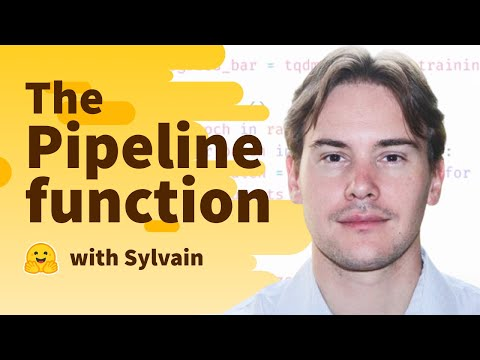

In [ ]:
# 2.0
from IPython.display import YouTubeVideo
YouTubeVideo('tiZFewofSLM')


Look at all summarization models [here](https://huggingface.co/models?library=transformers&pipeline_tag=summarization&sort=downloads).  

If no model name is provided the pipeline will be initialized with  
default model `sshleifer/distilbart-cnn-12-6`.

In [ ]:
# 2.1 Create a pipeline object:
summarizer = pipeline(
                      task="summarization",
                      model="facebook/bart-large-cnn",   # This is the most downloaded model
                      min_length=20,  # min length of response tokens (not very sure)
                      max_length=40,  # max length of response tokens (not very sure)
                      truncation=True,
                      model_kwargs={"cache_dir": "/content/cache/"},
                     )  # Note: We specify cache_dir to use predownloaded models.

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# 2.2 Apply to only one article:

summarizer(xsum_sample["document"][0])

[{'summary_text': 'Many roads in Peeblesshire remain badly affected by standing water. The full cost of damage in Newton Stewart is still being assessed. First Minister Nicola Sturgeon visited the area to inspect'}]

In [ ]:
# 2.3 Create a pipeline object with defaults:

summarizer = pipeline(
                      task="summarization",
                      )

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
# 2.4 Summarize with default model:

summarizer(xsum_sample["document"][0])

[{'summary_text': ' First Minister Nicola Sturgeon visited the area to inspect the damage . Many businesses and householders were affected by flooding in Newton Stewart . Many roads in Peeblesshire remain badly affected by standing water . Flood alert remains in place across the Borders because of the constant rain . Peebles was badly hit by problems, sparking calls to introduce more defences .'}]

### Sentiment analysis
Models for sentiment analysis are [here](https://huggingface.co/models?pipeline_tag=token-classification&library=transformers&sort=downloads)    
Datasets for text classification are [here](https://huggingface.co/datasets?task_categories=task_categories:token-classification&sort=trending)

In [ ]:
# 3.0 Download dataset:

poem_dataset = load_dataset(
                             "poem_sentiment",
                             version="1.0.0",
                             cache_dir="/content/cache/"
                           )


In [ ]:
# 3.1 Get a sample:

poem_sample = poem_dataset["train"].select(range(10))
poem_sample

Dataset({
    features: ['id', 'verse_text', 'label'],
    num_rows: 10
})

In [ ]:
# 3.2 Display samples:

display(poem_sample.to_pandas())

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3
5,5,the red sword sealed their vows!,3
6,6,and very venus of a pipe.,2
7,7,"who the man, who, called a brother.",2
8,8,"and so on. then a worthless gaud or two,",0
9,9,to hide the orb of truth--and every throne,2


Please see this [link](https://huggingface.co/nickwong64/bert-base-uncased-poems-sentiment) on the model card of `nickwong64/bert-base-uncased-poems-sentiment`

In [ ]:
# 3.3 Pipeline for sentiment classification:

sentiment_classifier = pipeline(
                                 task="text-classification",
                                 model="nickwong64/bert-base-uncased-poems-sentiment",
                                 model_kwargs={"cache_dir": "/content/cache/"},
                                )

config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/348 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
# 3.4 Results of classification:

results = sentiment_classifier(poem_sample["verse_text"])

In [ ]:
results

[{'label': 'positive', 'score': 0.9965937733650208},
 {'label': 'no_impact', 'score': 0.9987409710884094},
 {'label': 'negative', 'score': 0.995965838432312},
 {'label': 'mixed', 'score': 0.9687354564666748},
 {'label': 'mixed', 'score': 0.9759674668312073},
 {'label': 'mixed', 'score': 0.9665797352790833},
 {'label': 'no_impact', 'score': 0.9986388087272644},
 {'label': 'no_impact', 'score': 0.9986108541488647},
 {'label': 'negative', 'score': 0.9965572357177734},
 {'label': 'no_impact', 'score': 0.9985186457633972}]

In [ ]:
# 3.5 Display the predicted sentiment side-by-side
#     with the ground-truth label and original text.
#     The score indicates the model's confidence in its prediction.

# 3.5.1 Join predictions with ground-truth data
joined_data = (
    pd.DataFrame.from_dict(results)
    .rename({"label": "predicted_label"}, axis=1)
    .join(pd.DataFrame.from_dict(poem_sample).rename({"label": "true_label"}, axis=1))
)



,predicted_label,true_label,score,verse_text
0,positive,positive,0.996594,with pale blue berries. in these peaceful shad...
1,no_impact,no_impact,0.998741,"it flows so long as falls the rain,"
2,negative,negative,0.995966,"and that is why, the lonesome day,"
3,mixed,mixed,0.968735,"when i peruse the conquered fame of heroes, an..."
4,mixed,mixed,0.975967,of inward strife for truth and liberty.
5,mixed,mixed,0.966580,the red sword sealed their vows!
6,no_impact,no_impact,0.998639,and very venus of a pipe.
7,no_impact,no_impact,0.998611,"who the man, who, called a brother."
8,negative,negative,0.996557,"and so on. then a worthless gaud or two,"
9,no_impact,no_impact,0.998519,to hide the orb of truth--and every throne


In [ ]:
# 3.5.2 Change label indices to text labels
sentiment_labels = {0: "negative", 1: "positive", 2: "no_impact", 3: "mixed"}
joined_data = joined_data.replace({"true_label": sentiment_labels})

In [ ]:
# 3.5.3
display(joined_data[["predicted_label", "true_label", "score", "verse_text"]])

### Translation

Translation models may be designed for specific pairs of languages, or they may support more than two languages. We will see both below.
Background reading: See the Hugging Face task page on [translation](https://huggingface.co/tasks/translation).

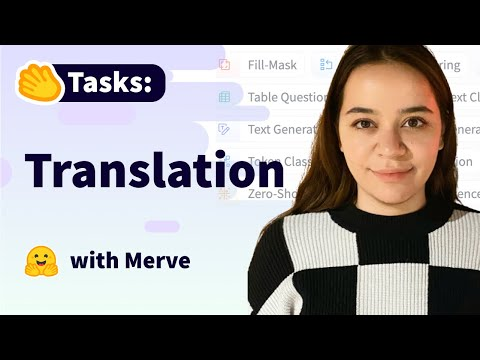

In [ ]:
# 4.0

from IPython.display import YouTubeVideo
YouTubeVideo('1JvfrvZgi6c')

Translation models are [here](https://huggingface.co/models?pipeline_tag=translation&library=transformers&sort=downloads)    

Datasets for translation are [here](https://huggingface.co/datasets?task_categories=task_categories:translation&sort=trending)

In this section, we will use:
* Data: We will use some example hard-coded sentences. However, there are a variety of translation datasets available from Hugging Face.
* Models:
>>**Helsinki-NLP/opus-mt-en-es** is used for the first example of English ("en") to Spanish ("es") translation. This model is based on Marian NMT, a neural machine translation framework developed by Microsoft and other researchers. See the GitHub page for code and links to related resources.    
>>**t5-small model**, which has 60 million parameters (242MB for PyTorch). T5 is an encoder-decoder model created by Google which supports several tasks such as summarization, translation, Q&A, and text classification. For more details, see the Google blog post, code on GitHub, or the research paper. For our purposes, it supports translation for English, French, Romanian, and German.

Some models are designed for specific language-to-language translation. Below, we use an English-to-Spanish model:

In [ ]:
# 4.1 Pipeline:
en_to_es_translation_pipeline = pipeline(
                                          task="translation",
                                          model="Helsinki-NLP/opus-mt-en-es",
                                          model_kwargs={"cache_dir": "/content/cache/"},
                                        )

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

In [ ]:
# 4.2 Execute pipeline:

en_to_es_translation_pipeline(
                              "Existing, open-source (and proprietary) models can be used out-of-the-box for many applications."
                             )

[{'translation_text': 'Los modelos existentes, de código abierto (y propietario) se pueden utilizar fuera de la caja para muchas aplicaciones.'}]

### Zero Shot Classification   
Zero Shot Classification is the task of predicting a class that wasn't seen by the model during training. This method, which leverages a pre-trained language model, can be thought of as an instance of transfer learning which generally refers to using a model trained for one task in a different application than what it was originally trained for. This is particularly useful for situations where the amount of labeled data is small.

In zero shot classification, we provide the model with a prompt and a sequence of text that describes what we want our model to do, in natural language. Zero-shot classification excludes any examples of the desired task being completed. This differs from single or few-shot classification, as these tasks include a single or a few examples of the selected task.

Zero, single and few-shot classification seem to be an emergent feature of large language models. This feature seems to come about around model sizes of +100M parameters. The effectiveness of a model at a zero, single or few-shot task seems to scale with model size, meaning that larger models (models with more trainable parameters or layers) generally do better at this task.

In this section, we will use:

>Data: a few example articles from the xsum dataset used in the Summarization section above. Our goal is to label news articles under a few categories.    
>Model: `nli-deberta-v3-small`, a fine-tuned version of the DeBERTa model. The DeBERTa base model was developed by Microsoft and is one of several models derived from BERT; for more details on DeBERTa, see the [Hugging Face doc page](https://huggingface.co/docs/transformers/model_doc/deberta).


In [ ]:
# 5.0 Pipeline for zero-shot clssification:

zero_shot_pipeline = pipeline(
                              task="zero-shot-classification",
                              model="cross-encoder/nli-deberta-v3-small",
                              model_kwargs={"cache_dir": "/content/cache/"},
                             )

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# 5.1 Define a function to categorize. We have defined
#     the function to avoid repeating the same steps multiple
#     times in our many examples below:

def categorize_article(article: str) -> None:
    """
    This helper function defines the categories (labels) which the model must use to label articles.
    Note that our model was NOT fine-tuned to use these specific labels,
    but it "knows" what the labels mean from its more general training.

    This function then prints out the predicted labels alongside their confidence scores.
    """
    # 5.1.1
    results = zero_shot_pipeline(
                                  article,
                                  candidate_labels=[
                                                     "politics",
                                                     "finance",
                                                     "sports",
                                                     "science and technology",
                                                     "pop culture",
                                                     "breaking news",
                                                   ],
                                 )
    # 5.1.2 Remove article from results
    del results["sequence"]
    # 5.1.3 Print the results nicely
    display(pd.DataFrame(results))

In [ ]:
# 5.2 Ist example of invoking function:

categorize_article(
    """
Simone Favaro got the crucial try with the last move of the game, following earlier touchdowns by Chris Fusaro, Zander Fagerson and Junior Bulumakau.
Rynard Landman and Ashton Hewitt got a try in either half for the Dragons.
Glasgow showed far superior strength in depth as they took control of a messy match in the second period.
Home coach Gregor Townsend gave a debut to powerhouse Fijian-born Wallaby wing Taqele Naiyaravoro, and centre Alex Dunbar returned from long-term injury, while the Dragons gave first starts of the season to wing Aled Brew and hooker Elliot Dee.
Glasgow lost hooker Pat McArthur to an early shoulder injury but took advantage of their first pressure when Rory Clegg slotted over a penalty on 12 minutes.
It took 24 minutes for a disjointed game to produce a try as Sarel Pretorius sniped from close range and Landman forced his way over for Jason Tovey to convert - although it was the lock's last contribution as he departed with a chest injury shortly afterwards.
Glasgow struck back when Fusaro drove over from a rolling maul on 35 minutes for Clegg to convert.
But the Dragons levelled at 10-10 before half-time when Naiyaravoro was yellow-carded for an aerial tackle on Brew and Tovey slotted the easy goal.
The visitors could not make the most of their one-man advantage after the break as their error count cost them dearly.
It was Glasgow's bench experience that showed when Mike Blair's break led to a short-range score from teenage prop Fagerson, converted by Clegg.
Debutant Favaro was the second home player to be sin-binned, on 63 minutes, but again the Warriors made light of it as replacement wing Bulumakau, a recruit from the Army, pounced to deftly hack through a bouncing ball for an opportunist try.
The Dragons got back within striking range with some excellent combined handling putting Hewitt over unopposed after 72 minutes.
However, Favaro became sinner-turned-saint as he got on the end of another effective rolling maul to earn his side the extra point with the last move of the game, Clegg converting.
Dragons director of rugby Lyn Jones said: "We're disappointed to have lost but our performance was a lot better [than against Leinster] and the game could have gone either way.
"Unfortunately too many errors behind the scrum cost us a great deal, though from where we were a fortnight ago in Dublin our workrate and desire was excellent.
"It was simply error count from individuals behind the scrum that cost us field position, it's not rocket science - they were correct in how they played and we had a few errors, that was the difference."
Glasgow Warriors: Rory Hughes, Taqele Naiyaravoro, Alex Dunbar, Fraser Lyle, Lee Jones, Rory Clegg, Grayson Hart; Alex Allan, Pat MacArthur, Zander Fagerson, Rob Harley (capt), Scott Cummings, Hugh Blake, Chris Fusaro, Adam Ashe.
Replacements: Fergus Scott, Jerry Yanuyanutawa, Mike Cusack, Greg Peterson, Simone Favaro, Mike Blair, Gregor Hunter, Junior Bulumakau.
Dragons: Carl Meyer, Ashton Hewitt, Ross Wardle, Adam Warren, Aled Brew, Jason Tovey, Sarel Pretorius; Boris Stankovich, Elliot Dee, Brok Harris, Nick Crosswell, Rynard Landman (capt), Lewis Evans, Nic Cudd, Ed Jackson.
Replacements: Rhys Buckley, Phil Price, Shaun Knight, Matthew Screech, Ollie Griffiths, Luc Jones, Charlie Davies, Nick Scott.
"""
)

,labels,scores
0,sports,0.469012
1,breaking news,0.223165
2,science and technology,0.107025
3,pop culture,0.104471
4,politics,0.057390
5,finance,0.038937


In [ ]:
# 5.3 IInd example:

categorize_article(
    """
The full cost of damage in Newton Stewart, one of the areas worst affected, is still being assessed.
Repair work is ongoing in Hawick and many roads in Peeblesshire remain badly affected by standing water.
Trains on the west coast mainline face disruption due to damage at the Lamington Viaduct.
Many businesses and householders were affected by flooding in Newton Stewart after the River Cree overflowed into the town.
First Minister Nicola Sturgeon visited the area to inspect the damage.
The waters breached a retaining wall, flooding many commercial properties on Victoria Street - the main shopping thoroughfare.
Jeanette Tate, who owns the Cinnamon Cafe which was badly affected, said she could not fault the multi-agency response once the flood hit.
However, she said more preventative work could have been carried out to ensure the retaining wall did not fail.
"It is difficult but I do think there is so much publicity for Dumfries and the Nith - and I totally appreciate that - but it is almost like we're neglected or forgotten," she said.
"That may not be true but it is perhaps my perspective over the last few days.
"Why were you not ready to help us a bit more when the warning and the alarm alerts had gone out?"
Meanwhile, a flood alert remains in place across the Borders because of the constant rain.
Peebles was badly hit by problems, sparking calls to introduce more defences in the area.
Scottish Borders Council has put a list on its website of the roads worst affected and drivers have been urged not to ignore closure signs.
The Labour Party's deputy Scottish leader Alex Rowley was in Hawick on Monday to see the situation first hand.
He said it was important to get the flood protection plan right but backed calls to speed up the process.
"I was quite taken aback by the amount of damage that has been done," he said.
"Obviously it is heart-breaking for people who have been forced out of their homes and the impact on businesses."
He said it was important that "immediate steps" were taken to protect the areas most vulnerable and a clear timetable put in place for flood prevention plans.
Have you been affected by flooding in Dumfries and Galloway or the Borders? Tell us about your experience of the situation and how it was handled. Email us on selkirk.news@bbc.co.uk or dumfries@bbc.co.uk.
"""
)

,labels,scores
0,breaking news,0.208211
1,politics,0.173790
2,pop culture,0.173753
3,science and technology,0.157181
4,sports,0.154562
5,finance,0.132503


### Few-Shot Learning?
See huggingface [here](https://huggingface.co/blog/few-shot-learning-gpt-neo-and-inference-api)

Few-Shot Learning refers to the practice of feeding a machine learning model with a very small amount of training data to guide its predictions, like a few examples at inference time, as opposed to standard fine-tuning techniques which require a relatively large amount of training data for the pre-trained model to adapt to the desired task with accuracy.

This technique has been mostly used in computer vision, but with some of the latest Language Models, like `EleutherAI GPT-Neo` and `OpenAI GPT-3`, we can now use it in Natural Language Processing (NLP).

In NLP, Few-Shot Learning can be used with Large Language Models, which have learned to perform a wide number of tasks implicitly during their pre-training on large text datasets. This enables the model to generalize, that is to understand related but previously unseen tasks, with just a few examples.

Few-Shot NLP examples consist of three main components:

>**Task Description**: A short description of what the model should do, e.g. "Translate English to French"   

>**Examples**: A few examples showing the model what it is expected to predict, e.g. "sea otter => loutre de mer"    

>**Prompt**: The beginning of a new example, which the model should complete by generating the missing text, e.g. "cheese => "    


See model card [EleutherAI/gpt-neo-1.3B](https://huggingface.co/EleutherAI/gpt-neo-1.3B)   

`GPT-Neo 1.3B` is a transformer model designed using EleutherAI's replication of the GPT-3 architecture. GPT-Neo refers to the class of models, while 1.3B represents the number of parameters of this particular pre-trained model.

In [ ]:
# 6.0 We will limit the response length for our few-shot learning tasks.
#     Session crashed?
few_shot_pipeline = pipeline(
                             task="text-generation",
                             model="EleutherAI/gpt-neo-1.3B",
                             max_new_tokens=10,
                             model_kwargs={"cache_dir": "/content/cache/"},
                            )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

*Tip*: In the few-shot prompts below, we separate the examples with a special token "###" and use the same token to encourage the LLM to end its output after answering the query. We will tell the pipeline to use that special token as the end-of-sequence (EOS) token below.   

In all the examples below, the sentiment of the last tweet remains to be classified.    

In [ ]:
# 6.0.1 Get the token ID for "###",
#       which we will use as the EOS token below.

eos_token_id = few_shot_pipeline.tokenizer.encode("###")[0]
eos_token_id

21017

In [ ]:
# 6.2 With only 1 example, the model may or may not get the answer right.

results = few_shot_pipeline(
                            """For each tweet, describe its sentiment:

                                  [Tweet]: "This is the link to the article"
                                  [Sentiment]: Neutral
                                ###
                                  [Tweet]: "This new music video was incredible"
                                  [Sentiment]:""",
                              eos_token_id=eos_token_id,
                          )

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


In [ ]:
# 6.2.1

print(results[0]["generated_text"])

For each tweet, describe its sentiment:

                                  [Tweet]: "This is the link to the article"
                                  [Sentiment]: Neutral
                                ###
                                  [Tweet]: "This new music video was incredible"
                                  [Sentiment]: Neutral
        


In [ ]:
# 6.3 With 1 example for each sentiment, the model is more likely to understand!

results = few_shot_pipeline(
                            """For each tweet, describe its sentiment:

                                [Tweet]: "I hate it when my phone battery dies."
                                [Sentiment]: Negative
                              ###
                                [Tweet]: "My day has been 👍"
                                [Sentiment]: Positive
                              ###
                                [Tweet]: "This is the link to the article"
                                [Sentiment]: Neutral
                              ###
                                [Tweet]: "This new music video was incredible"
                                [Sentiment]:""",

                            eos_token_id=eos_token_id,
                        )

# 6.3.1
print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


For each tweet, describe its sentiment:

                                [Tweet]: "I hate it when my phone battery dies."
                                [Sentiment]: Negative
                              ###
                                [Tweet]: "My day has been 👍"
                                [Sentiment]: Positive
                              ###
                                [Tweet]: "This is the link to the article"
                                [Sentiment]: Neutral
                              ###
                                [Tweet]: "This new music video was incredible"
                                [Sentiment]: Neutral
        


Just for fun, we show a few more examples below.

In [ ]:
# 6.4 The model isn't ready to serve drinks!

results = few_shot_pipeline(
                            """For each food, suggest a good drink pairing:

                                      [food]: tapas
                                      [drink]: wine
                                    ###
                                      [food]: pizza
                                      [drink]: soda
                                    ###
                                      [food]: jalapenos poppers
                                      [drink]: beer
                                    ###
                                      [food]: scone
                                      [drink]:""",

                            eos_token_id=eos_token_id,
                        )

# 6.4.1
print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


For each food, suggest a good drink pairing:

                                      [food]: tapas
                                      [drink]: wine
                                    ###
                                      [food]: pizza
                                      [drink]: soda
                                    ###
                                      [food]: jalapenos poppers
                                      [drink]: beer
                                    ###
                                      [food]: scone
                                      [drink]: wine
        


In [ ]:
# 6.5 This example sometimes works and sometimes does not, when sampling.
#     Too abstract?

results = few_shot_pipeline(
                            """Given a word describing how someone is feeling, suggest a description of that person.  The description should not include the original word.

                                [word]: happy
                                [description]: smiling, laughing, clapping
                                ###
                                [word]: nervous
                                [description]: glancing around quickly, sweating, fidgeting
                                ###
                                [word]: sleepy
                                [description]: heavy-lidded, slumping, rubbing eyes
                                ###
                                [word]: confused
                                [description]:""",

                            eos_token_id=eos_token_id,
)

# 6.5.1
print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


Given a word describing how someone is feeling, suggest a description of that person.  The description should not include the original word.

                                [word]: happy
                                [description]: smiling, laughing, clapping
                                ###
                                [word]: nervous
                                [description]: glancing around quickly, sweating, fidgeting
                                ###
                                [word]: sleepy
                                [description]: heavy-lidded, slumping, rubbing eyes
                                ###
                                [word]: confused
                                [description]: stumbling
        


In [ ]:
# 6.6 We override max_new_tokens to generate longer answers.
#     These book descriptions were taken from their corresponding Wikipedia pages.

results = few_shot_pipeline(
                            """Generate a book summary from the title:

                                [book title]: "Stranger in a Strange Land"
                                [book description]: "This novel tells the story of Valentine Michael Smith, a human who comes to Earth in early adulthood after being born on the planet Mars and raised by Martians, and explores his interaction with and eventual transformation of Terran culture."
                                ###
                                [book title]: "The Adventures of Tom Sawyer"
                                [book description]: "This novel is about a boy growing up along the Mississippi River. It is set in the 1840s in the town of St. Petersburg, which is based on Hannibal, Missouri, where Twain lived as a boy. In the novel, Tom Sawyer has several adventures, often with his friend Huckleberry Finn."
                                ###
                                [book title]: "Dune"
                                [book description]: "This novel is set in the distant future amidst a feudal interstellar society in which various noble houses control planetary fiefs. It tells the story of young Paul Atreides, whose family accepts the stewardship of the planet Arrakis. While the planet is an inhospitable and sparsely populated desert wasteland, it is the only source of melange, or spice, a drug that extends life and enhances mental abilities.  The story explores the multilayered interactions of politics, religion, ecology, technology, and human emotion, as the factions of the empire confront each other in a struggle for the control of Arrakis and its spice."
                                ###
                                [book title]: "Blue Mars"
                                [book description]:""",

                            eos_token_id=eos_token_id,
                            max_new_tokens=50,
                        )

# 6.6.1
print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


Generate a book summary from the title:

                                [book title]: "Stranger in a Strange Land"
                                [book description]: "This novel tells the story of Valentine Michael Smith, a human who comes to Earth in early adulthood after being born on the planet Mars and raised by Martians, and explores his interaction with and eventual transformation of Terran culture."
                                ###
                                [book title]: "The Adventures of Tom Sawyer"
                                [book description]: "This novel is about a boy growing up along the Mississippi River. It is set in the 1840s in the town of St. Petersburg, which is based on Hannibal, Missouri, where Twain lived as a boy. In the novel, Tom Sawyer has several adventures, often with his friend Huckleberry Finn."
                                ###
                                [book title]: "Dune"
                                [book description]: "This

Hugging Face APIs

In this section, we dive into some more details on Hugging Face APIs.

>* Search and sampling to generate text
>* Auto* loaders for tokenizers and models
>* Model-specific loaders

Recall the xsum dataset from the Summarization section above:


In [ ]:
display(xsum_sample.to_pandas())

NameError: name 'xsum_sample' is not defined


Search and sampling in inference

You may see parameters like num_beams, do_sample, etc. specified in Hugging Face pipelines. These are inference configurations.

LLMs work by predicting (generating) the next token, then the next, and so on. The goal is to generate a high probability sequence of tokens, which is essentially a search through the (enormous) space of potential sequences.

To do this search, LLMs use one of two main methods:

* Search: Given the tokens generated so far, pick the next most likely token in a "search."
** Greedy search (default): Pick the single next most likely token in a greedy search.
** Beam search: Greedy search can be extended via beam search, which searches down several sequence paths, via the parameter num_beams.
* Sampling: Given the tokens generated so far, pick the next token by sampling from the predicted distribution of tokens.
** Top-K sampling: The parameter top_k modifies sampling by limiting it to the k most likely tokens.
** Top-p sampling: The parameter top_p modifies sampling by limiting it to the most likely tokens up to probability mass p.

You can toggle between search and sampling via parameter `do_sample`.

For more background on search and sampling, see [this Hugging Face blog post](https://huggingface.co/blog/how-to-generate).

We will illustrate these various options below using our summarization pipeline.


In [ ]:
# We previously called the summarization pipeline
# using the default inference configuration.
# This does greedy search.:

summarizer(xsum_sample["document"][0])

NameError: name 'summarizer' is not defined

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
# Load the pre-trained tokenizer and model.

tokenizer = AutoTokenizer.from_pretrained("t5-small",
                                          cache_dir="/content/cache/"
                                          )



In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small",
                                              cache_dir="/content/cache/")


In [ ]:
# From para 2.1 before:

summarizer = pipeline(
                      task="summarization",
                      model="facebook/bart-large-cnn",   # This is the most downloaded model
                      min_length=20,  # min length of response tokens (not very sure)
                      max_length=40,  # max length of response tokens (not very sure)
                      truncation=True,
                      model_kwargs={"cache_dir": "/content/cache/"},
                     )  # Note: We specify cache_dir to use predownloaded models.

In [ ]:
# It takes longer to run, but it might find
#  a better (more likely) sequence of text.

summarizer(xsum_sample["document"][0],
           num_beams=10
           )

In [ ]:
# Alternatively, we could use sampling.

summarizer(xsum_sample["document"][0],
           do_sample=True
           )

In [ ]:
# We can modify sampling to be more greedy by limiting sampling
#  to the top_k or top_p most likely next tokens.

summarizer(xsum_sample["document"][0],
           do_sample=True,
           top_k=10,
           top_p=0.8
           )

## Auto* loaders for tokenizers and models

We have already seen the dataset and pipeline abstractions from Hugging Face. While a pipeline is a quick way to set up an LLM for a given task, the slightly lower-level abstractions model and tokenizer permit a bit more control over options. We will show how to use those briefly, following this pattern:

* Given input articles.
* Tokenize them (converting to token indices).
* Apply the model on the tokenized data to generate summaries (represented as token indices).
* Decode the summaries into human-readable text.

We will first look at the [Auto* classes](https://huggingface.co/docs/transformers/model_doc/auto) for tokenizers and model types which can simplify loading pre-trained tokenizers and models.

API docs:

> [AutoTokenizer](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoTokenizer)    
> [AutoModelForSeq2SeqLM](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForSeq2SeqLM)    


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
# Load the pre-trained tokenizer and model:

tokenizer = AutoTokenizer.from_pretrained("t5-small", cache_dir="/content/cache/")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small", cache_dir="/content/cache/")

In [ ]:
# For summarization, T5-small expects a prefix "summarize: ",
#  so we prepend that to each article as a prompt.

articles = list(map(lambda article: "summarize: " + article, xsum_sample["document"]))

In [ ]:
display(pd.DataFrame(articles, columns=["prompts"]))

In [ ]:
# Tokenize the input:

inputs = tokenizer(
                    articles,
                    max_length=1024,
                    return_tensors="pt",
                    padding=True,
                    truncation=True
                  )



In [ ]:
print("input_ids:")
print(inputs["input_ids"])
print("attention_mask:")
print(inputs["attention_mask"])

In [ ]:
# Generate summaries
summary_ids = model.generate(
                              inputs.input_ids,
                              attention_mask=inputs.attention_mask,
                              num_beams=2,
                              min_length=0,
                              max_length=40,
                            )

In [ ]:
print(summary_ids)

In [ ]:
# Decode the generated summaries:

decoded_summaries = tokenizer.batch_decode(summary_ids,
                                           skip_special_tokens=True
                                           )

In [ ]:
display(pd.DataFrame(decoded_summaries,
                     columns=["decoded_summaries"]
                     )
        )


Model-specific tokenizer and model loaders

You can also more directly load specific tokenizer and model types, rather than relying on Auto* classes to choose the right ones for you.

API docs:

* [T5Tokenizer](https://huggingface.co/docs/transformers/main/en/model_doc/t5#transformers.T5Tokenizer)

* [T5ForConditionalGeneration](https://huggingface.co/docs/transformers/main/en/model_doc/t5#transformers.T5ForConditionalGeneration)



In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [ ]:
tokenizer = T5Tokenizer.from_pretrained("t5-small",
                                        cache_dir="/content/cache/"
                                        )

In [ ]:
model = T5ForConditionalGeneration.from_pretrained(
                                                    "t5-small",
                                                    cache_dir="/content/cache/"
                                                  )

In [ ]:
# The tokenizer and model can then be used similarly to how we used the ones loaded by the Auto* classes.
inputs = tokenizer(
                    articles,
                    max_length=1024,
                    return_tensors="pt",
                    padding=True,
                    truncation=True
                  )


In [ ]:
summary_ids = model.generate(
                              inputs.input_ids,
                              attention_mask=inputs.attention_mask,
                              num_beams=2,
                              min_length=0,
                              max_length=40,
                          )


In [ ]:
decoded_summaries = tokenizer.batch_decode(summary_ids,
                                           skip_special_tokens=True
                                           )


In [ ]:
display(
        pd.DataFrame(
                      decoded_summaries,
                      columns=["decoded_summaries"]
                      )
        )

## Summary

We've covered some common LLM applications and seen how to get started with them quickly using pre-trained models from the Hugging Face Hub. We've also see how to tweak some configurations.

But how did we find those models for our tasks? In the lab, you will find new pre-trained models for tasks, using the Hugging Face Hub. You will also explore tweaking model configurations to gain intuition about their effects.


In [ ]:
######### DONE ##############